# Perform Principle Component Analysis using numpy 

* Statistocal interperetation of SVD
* Hierarchical coordinate systems based on data
* In plain language: We assume that data have an underlying statistical distribution and we can uncover the dominant features of that distribution that "best" deescribe the data

In the PCA literature, the rows of the data matrix x are considered to be the measurments from a single experiment

In the SVD  literature, the columns of the data matrix x are considered to be the measurments from a single experiment

In [4]:
import matplotlib.pyplot as plt

import numpy as np

plt.rcParams['figure.figsize'] = [12, 12]

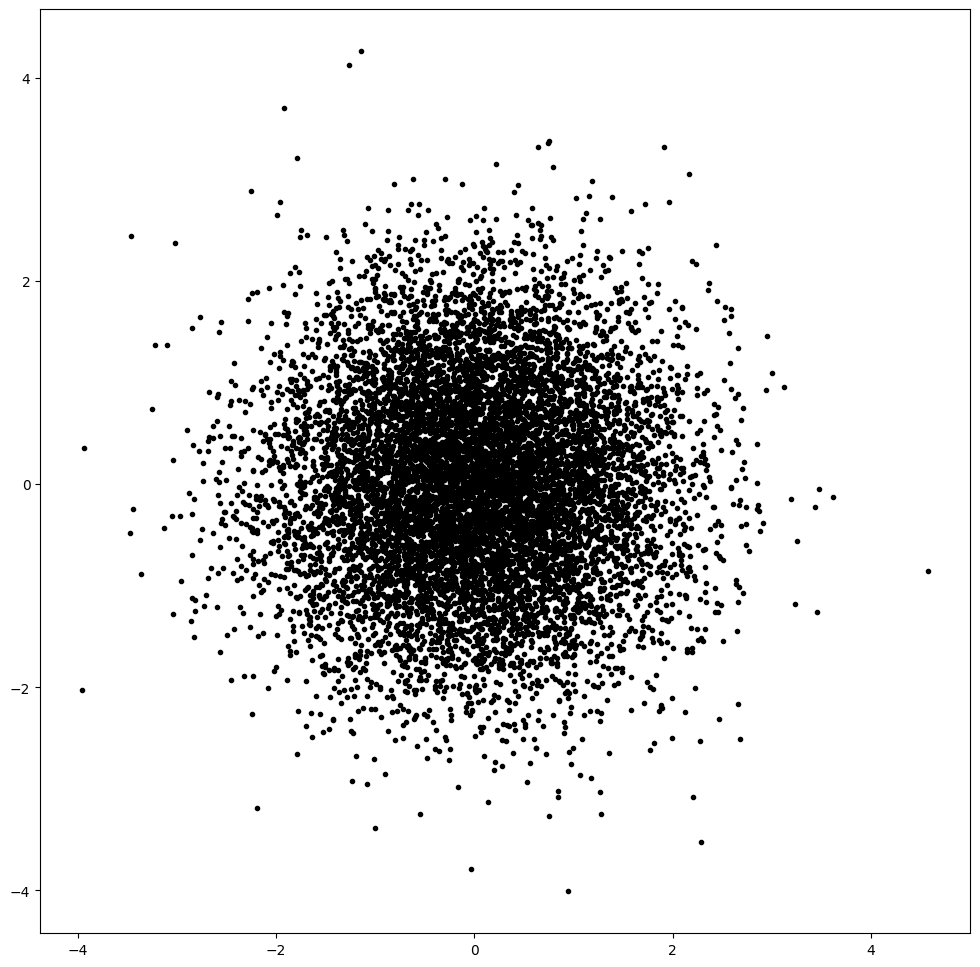

In [5]:
# Create two timepoints of the expression levels of 10,000 genes
# Gene expression should be normally distributed 

timepoints = 2
nGenes = 10000

X = np.random.randn(timepoints, nGenes)

plt.plot(X[0, :], X[1, :], '.', color = 'k')

In [6]:
from scipy.stats import norm
import ipywidgets as widgets

def plot_normal(mean, variance):
    x = np.linspace(-10, 10, num = 100)
    y = norm.pdf(x, mean, variance)

    plt.plot(x, y)
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.title('Normal Distribution with Mean = {} and Variance = {}'.format(mean, variance))
    plt.show()

widgets.interact(plot_normal, mean = widgets.FloatSlider(value = 0, min = -5, max = 5, step = 0.1), 
                variance = widgets.FloatSlider(value = 1, min = 0, max = 5, step = 0.1))

interactive(children=(FloatSlider(value=0.0, description='mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

<function __main__.plot_normal(mean, variance)>

(-10.0, 10.0)

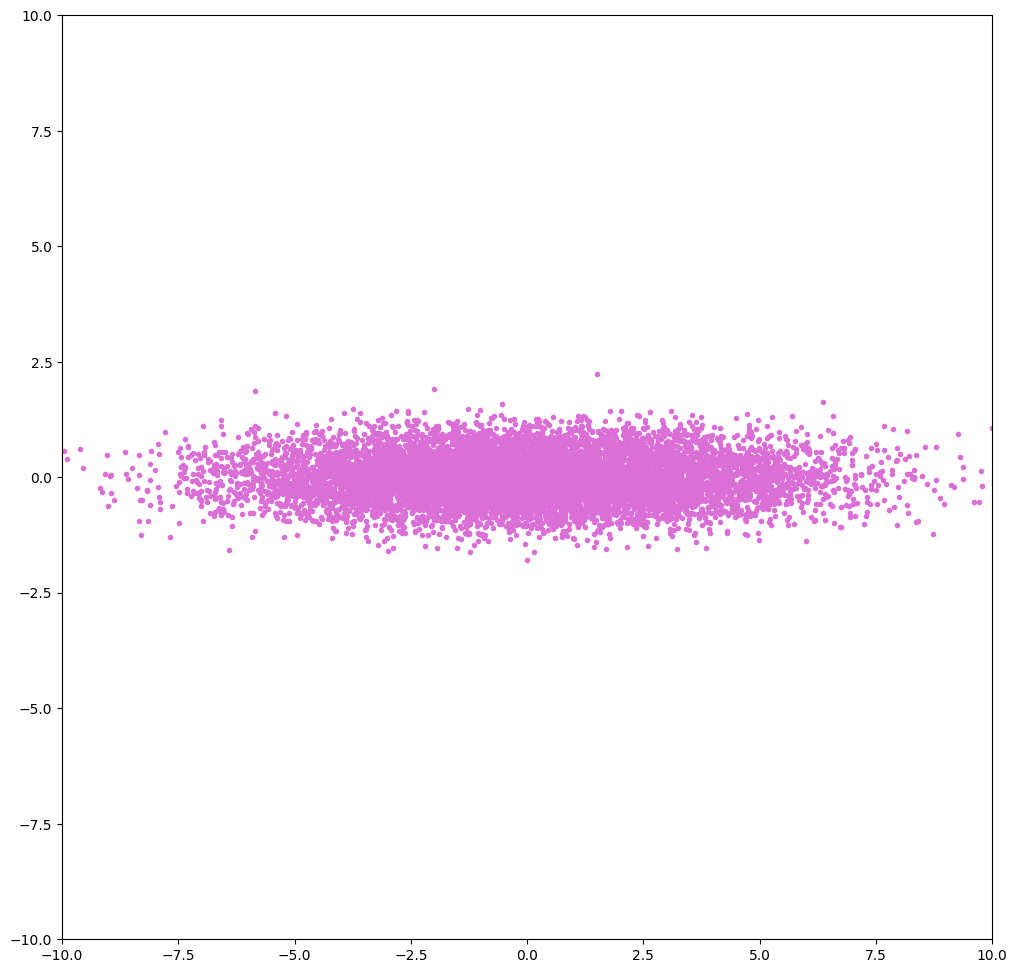

In [7]:
# Stretch the data by altering the variance (mew = mean, sigma = variance)

sig = np.array([3, 0.5])
X = np.diag(sig) @ np.random.randn(timepoints, nGenes)

plt.plot(X[0, :], X[1, :], '.', color = 'orchid')

plt.xlim((-10,10))
plt.ylim((-10,10))

(-10.0, 10.0)

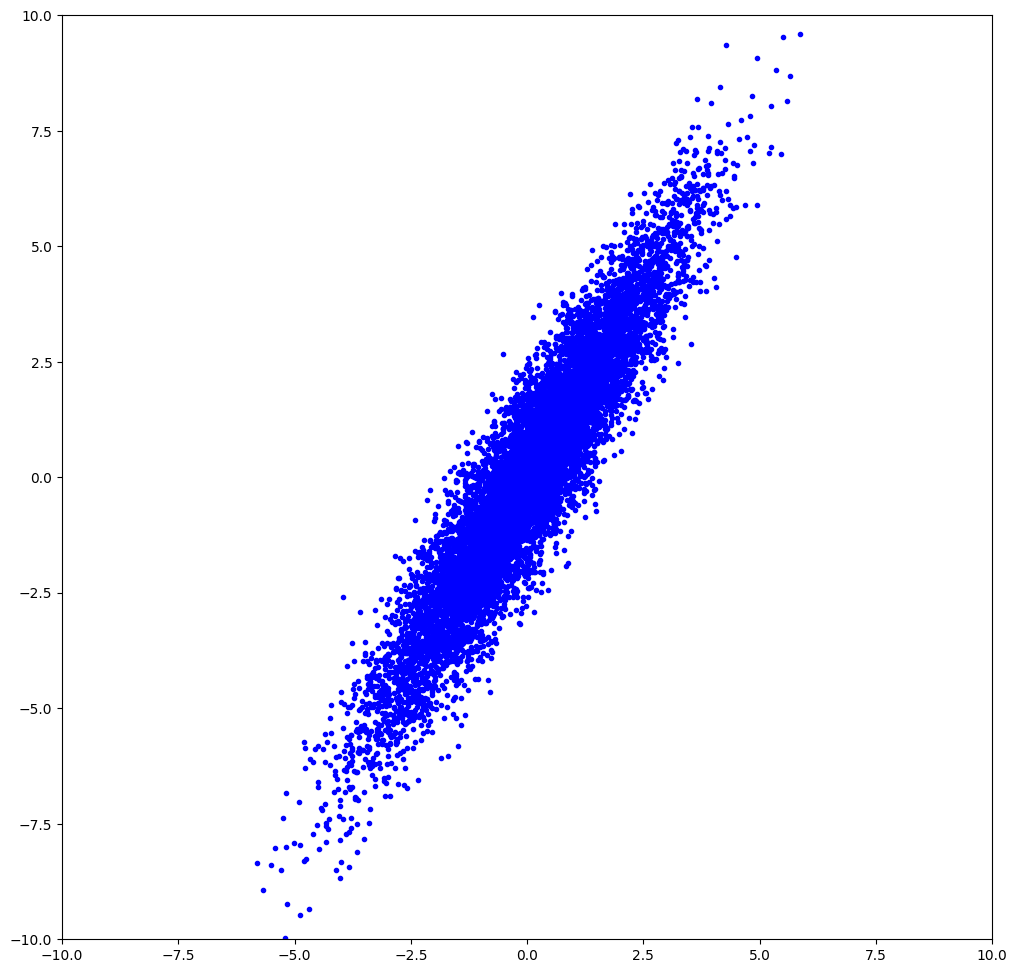

In [8]:
# Now, rotate data to create a 'hidden' natural dimension that are linear combinations of our basic 
# We are going to uncover what these dimensions are with PCA through the eigenvectors

theta = np.pi/3
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

X = R @ np.diag(sig) @ np.random.randn(timepoints, nGenes)

plt.plot(X[0, :], X[1, :], '.', color = 'b')

plt.xlim((-10,10))
plt.ylim((-10,10))

(-10.0, 10.0)

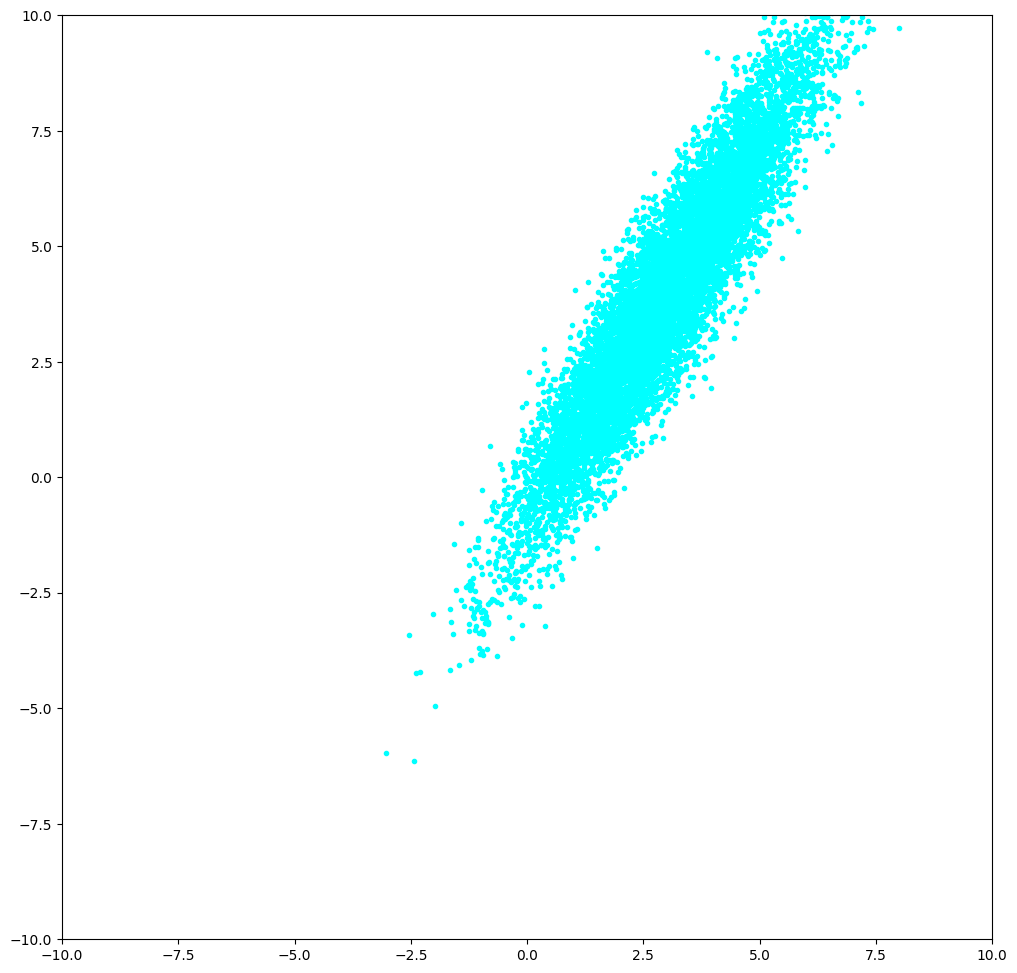

In [9]:
# Now off-center the data matrix

center = np.array([3,4])
X = R @ np.diag(sig) @ np.random.randn(timepoints, nGenes) + np.diag(center) @ np.ones((timepoints, nGenes))
plt.plot(X[0, :], X[1, :], '.', color = 'cyan')

plt.xlim((-10,10))
plt.ylim((-10,10))

# Now we un-do all of this with PCA
### First we need to mean center

Text(0.5, 1.0, 'Centered Data')

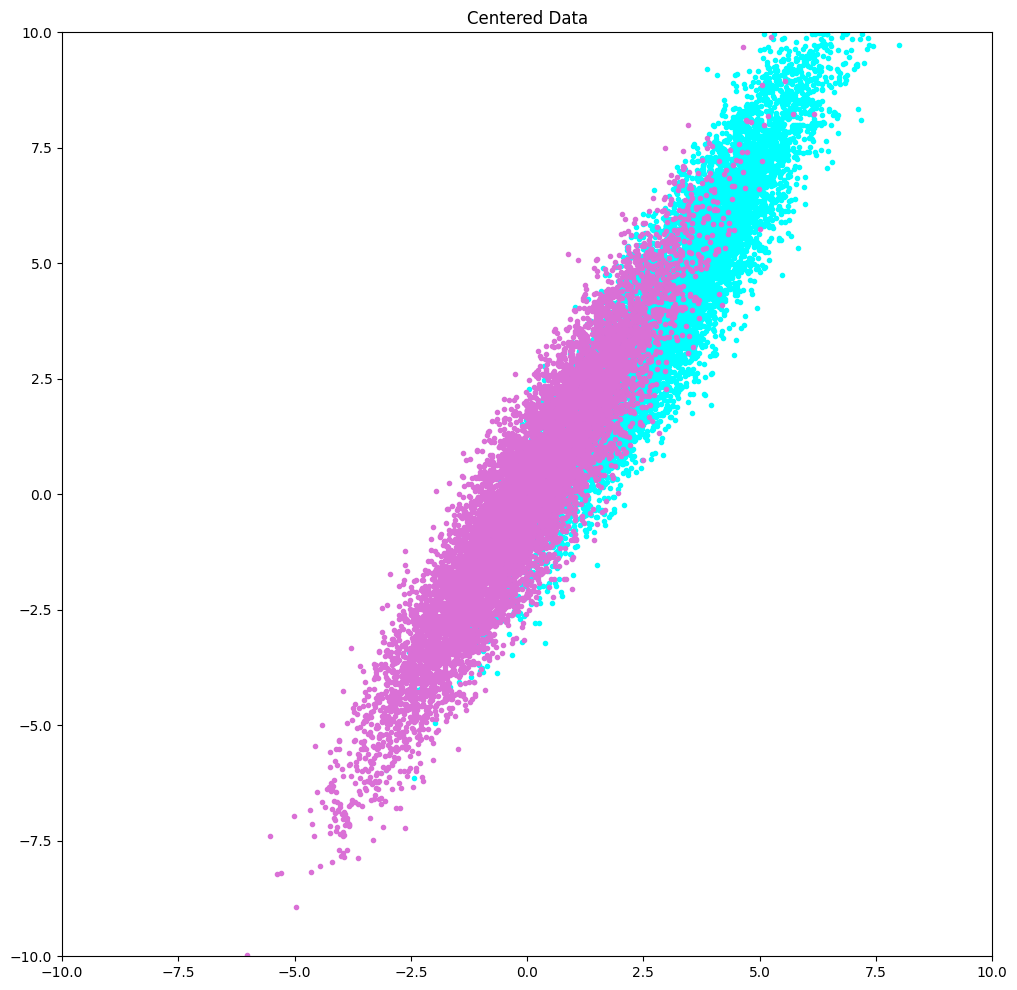

In [10]:
Y = X - np.mean(X, axis = 1).reshape(2, 1)

plt.plot(X[0, :], X[1, :], '.', color = 'cyan')

plt.plot(Y[0, :], Y[1, :], '.', color = 'orchid')

plt.xlim((-10,10))
plt.ylim((-10,10))

plt.title('Centered Data')

In [11]:
# Next we find the covariance matrix of Y

C = np.cov(Y)

print(C)

[[2.42410761 3.75973371]
 [3.75973371 6.77633766]]


In [23]:
# Find the eigenvalues and eigenvectors of the covariance matrix

evals, evecs = np.linalg.eig(C)

## return sorted eigenvalues and eigenvectors
idx = evals.argsort()[::-1] # greatest to least sorted
evals = evals[idx]
evecs = evecs[:, idx] # columns of eigenvalues (reshuffling the columns of a matrix)
print(evecs, evals)
print('PC1 = ', evecs[:,0], 'PC2 = ', evecs[:,1])
print('Lambda1 = ', evals[0], 'Lambda2 = ', evals[1])


[[-0.49953103 -0.86629599]
 [-0.86629599  0.49953103]] [8.9443076  0.25613767]
PC1 =  [-0.49953103 -0.86629599] PC2 =  [-0.86629599  0.49953103]
Lambda1 =  8.944307597288681 Lambda2 =  0.2561376710156198


Text(0.5, 1.0, 'Principle Components Plotted on Top of Mean Centered Data Y')

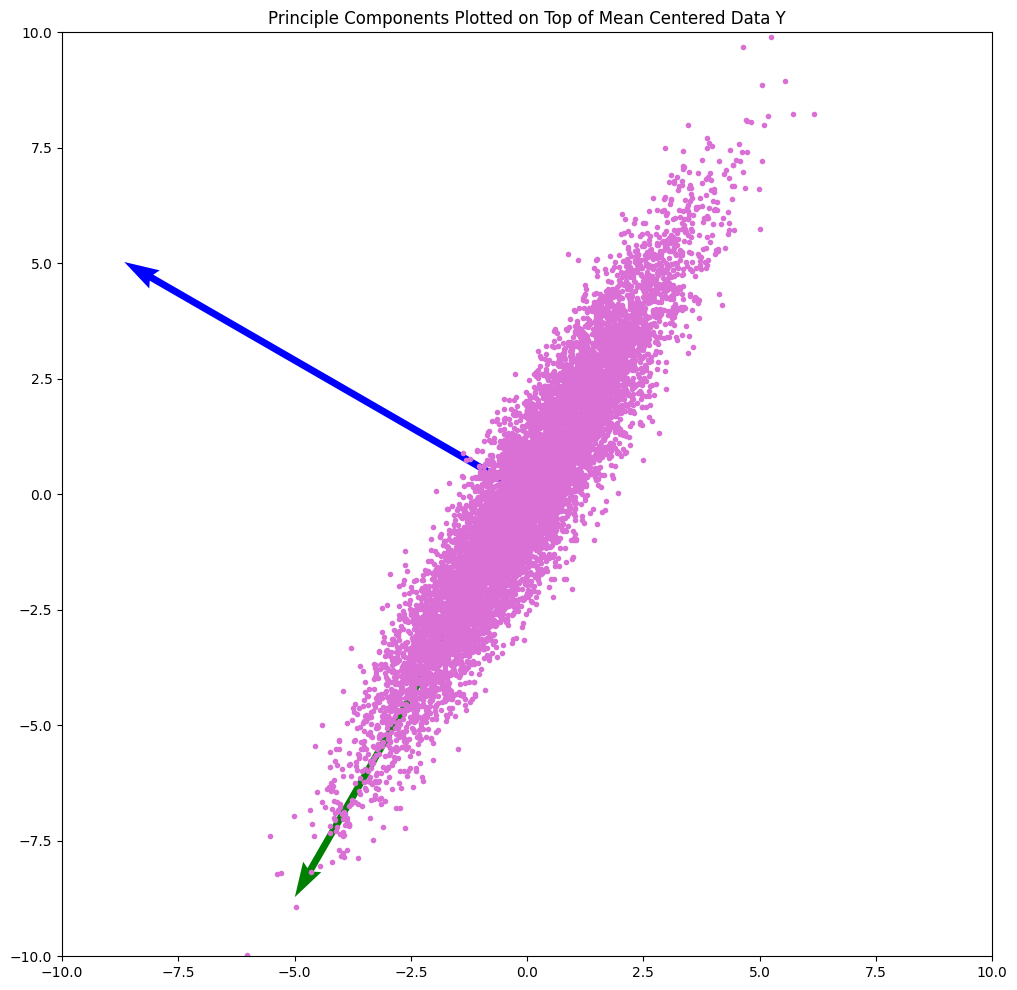

In [13]:
# Visual proof that the PCs are correct

origin = np.zeros((1, 2))

# Plot the mean centered data
plt.plot(Y[0,:], Y[1,:], '.', color = 'orchid')

plt.quiver(origin, origin, evecs[:,0], evecs[:,1], color = ['g', 'b'], scale = 2)
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.title('Principle Components Plotted on Top of Mean Centered Data Y')

Text(0.5, 1.0, 'Principal Components Plotted on Top of Mean Centered Data Y')

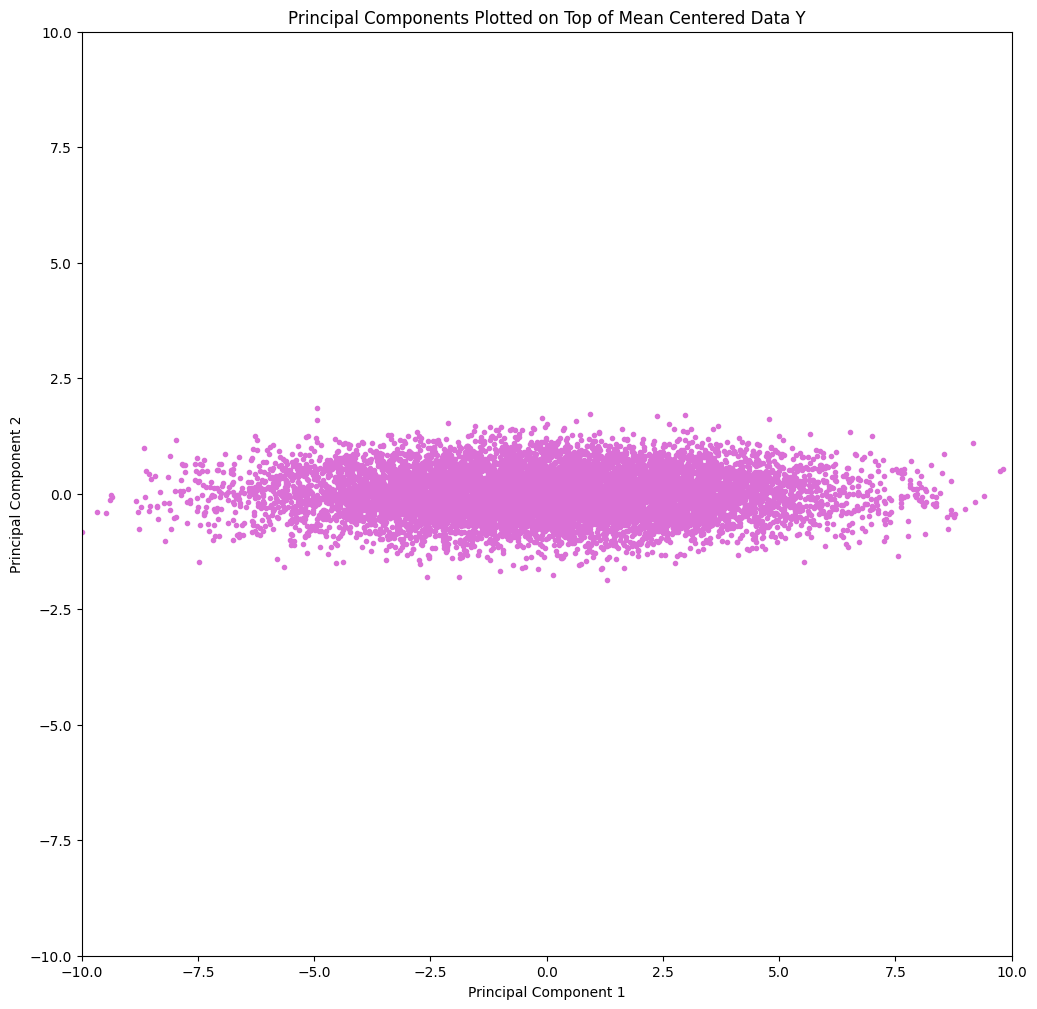

In [14]:
# Reproject the data back onto the principal components
# Plotting the data, or representing the data in terms of principal components

Y_reproj = np.transpose(evecs) @ Y

plt.plot(Y_reproj[0,:], Y_reproj[1,:], '.', color = 'orchid')
plt.xlim((-10,10))
plt.ylim((-10,10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components Plotted on Top of Mean Centered Data Y')

In [15]:
# Run an SVD

U, S, VT = np.linalg.svd(C, full_matrices = True)

print('Ucol1 = ', U[:,0], 'Ucol2 = ', U[:,1])

print('PC1 = ', evecs[:,0], 'PC2 = ', evecs[:,1])

# Columns of U are eigenvectors of C
# PCs of C are also eigenvectors of C

Ucol1 =  [-0.49953103 -0.86629599] Ucol2 =  [-0.86629599  0.49953103]
PC1 =  [-0.49953103 -0.86629599] PC2 =  [-0.86629599  0.49953103]


In [16]:
# Show the equivalence of eigenvalues
print('S1 = ', S[0], 'S2 = ', S[1])
print('Lambda1 = ', evals[0], 'Lambda2 = ', evals[1])

S1 =  8.944307597288683 S2 =  0.25613767101561774
Lambda1 =  0.2561376710156198 Lambda2 =  8.944307597288681


## Some Applications
# Compress data by removing the least important dimension

[[ 0.33794356 -2.17021986  2.25707562 ...  4.48593219 -5.05770532
   2.77514116]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


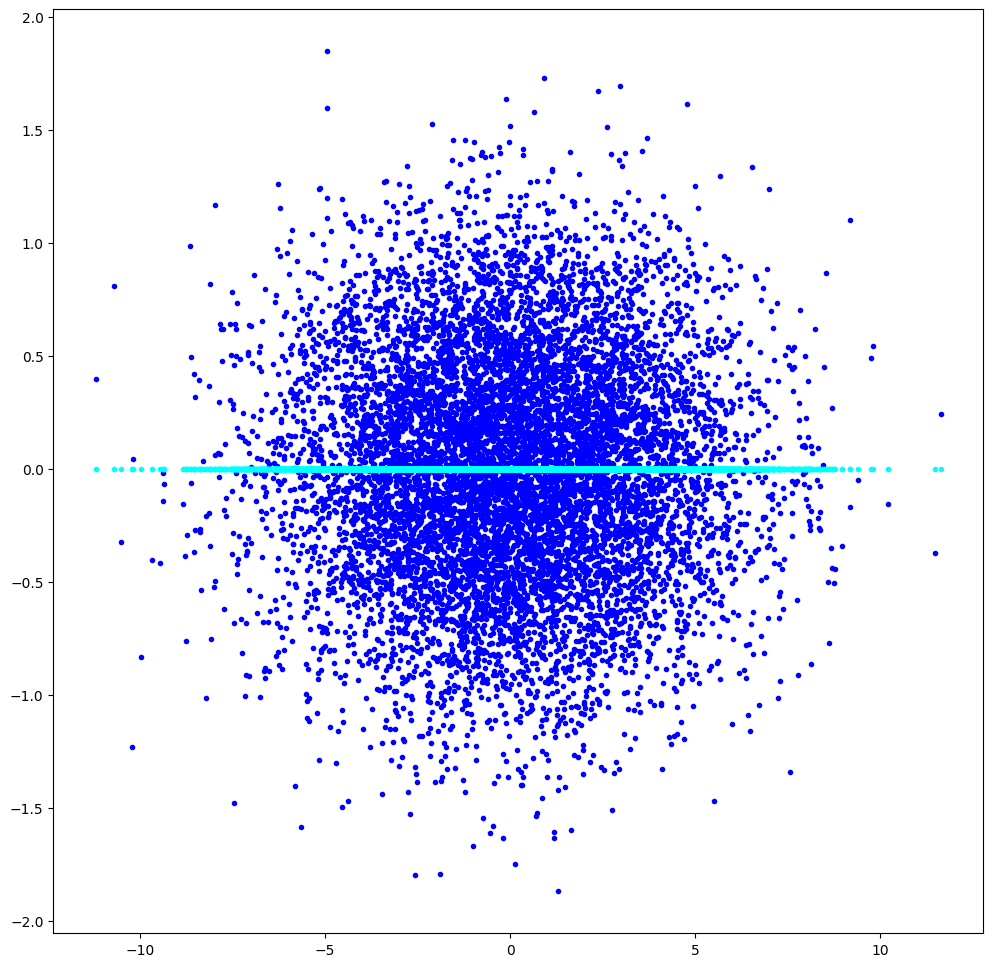

In [19]:
# how to compress projected data

evecs_rd = evecs
evecs_rd[:, 1] = 0

Y_approx = np.transpose(Y.T @ evecs_rd)
print(Y_approx)

plt.plot(Y_reproj[0, :], Y_reproj[1, :], '.', color = 'b')
plt.plot(Y_approx[0, :], Y_approx[1, :], '.', color = 'aqua')


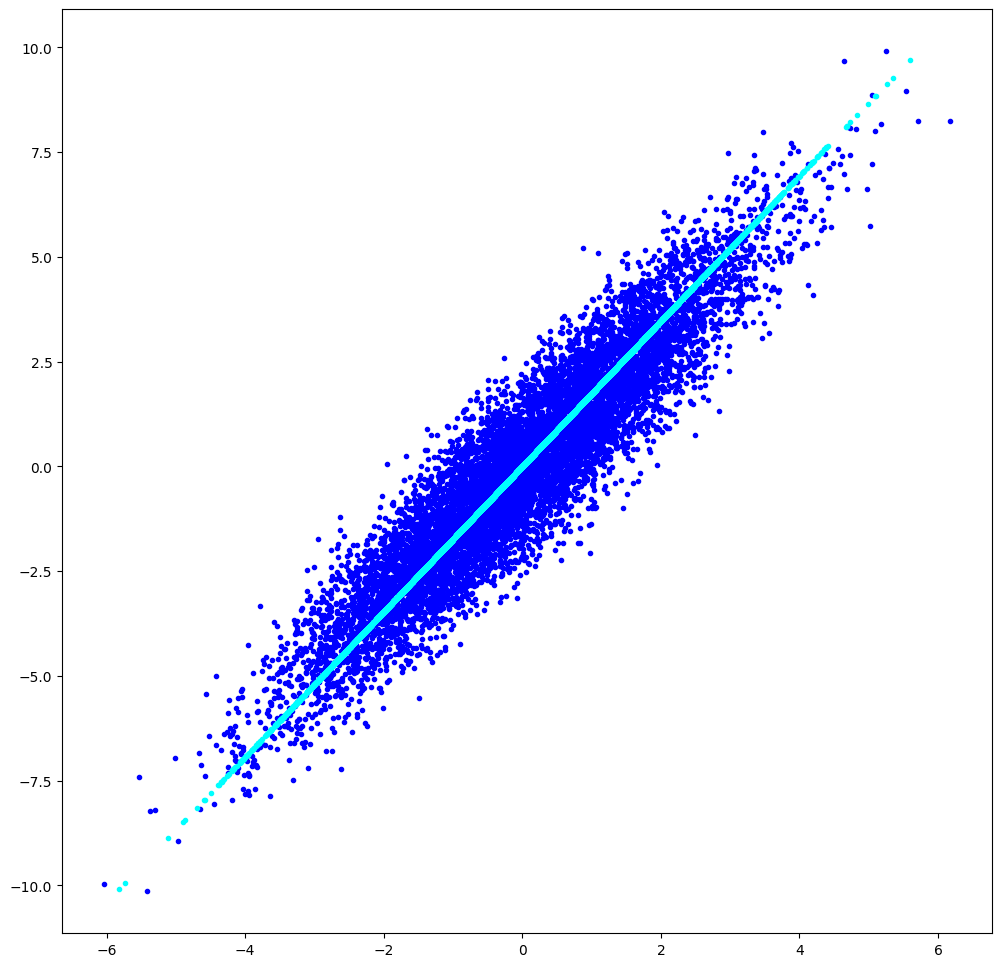

In [18]:
# Next, let's do the compression on the original axes

Y_approx = evecs_rd @ evecs_rd.T @ Y
plt.plot(Y[0,:], Y[1,:], '.', color = 'b')
plt.plot(Y_approx[0,:], Y_approx[1,:], '.', color = 'aqua')